# 1. Problem 5.2
$$
y[n] = bx[n] - 0.81y[n-2] \\
$$

## a.
$$
H(e^{j\omega}) = \frac{b}{1+0.81e^{-2j\omega}}
$$

## b.
$$
H(e^{j\omega}) = \frac{b}{1+0.81\cos{2\omega} - j0.81\sin{2\omega}} \\
|H(e^{j\omega})| = \frac{|b|}{\sqrt{(1+0.81\cos{2\omega})^2 + (0.81\sin{2\omega})^2}} = \frac{|b|}{\sqrt{1+(0.81)^2 + 2*0.81\cos{2\omega}}} \\
max|H(e^{j\omega})| = \frac{|b|}{\sqrt{1+(0.81)^2 + 2*0.81\cos{2\omega}}}|_{\cos{2\omega}=-1} = \frac{|b|}{\sqrt{1+(0.81)^2 - 2*0.81}} = 1 \\
=> |b| = 0.19 \\
=> |H(e^{j\omega})| = \frac{0.19}{\sqrt{1.6561 + 1.62\cos{2\omega}}}
$$

Text(0.5, 1.0, 'unwrapped phase(${H(e^{j\\omega})}$)')

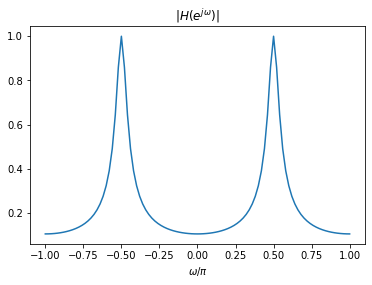

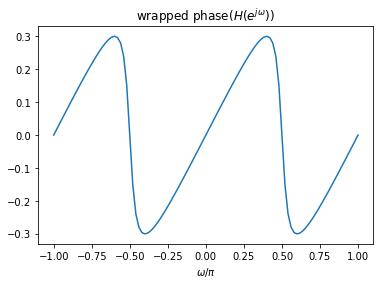

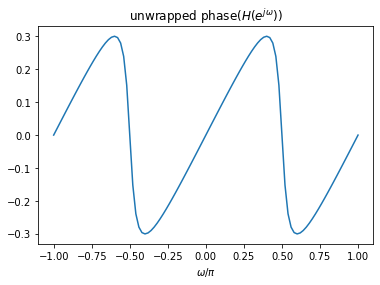

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = 1j
omega = np.linspace(-np.pi, np.pi, 101)
H = 0.19/(1 + 0.81*np.cos(2*omega) - 0.81*a*np.sin(2*omega))
mag = 0.19/np.sqrt(1.6561 + 1.62*np.cos(2*omega))
mag = np.absolute(H)
phase = np.angle(H)

plt.figure()
plt.plot(omega/np.pi, mag)
plt.xlabel('$\omega/\pi$')
plt.title('$|H(e^{j\omega})|$')

plt.figure()
plt.plot(omega/np.pi, phase/np.pi)
plt.xlabel('$\omega/\pi$')
plt.title('wrapped phase(${H(e^{j\omega})}$)')

plt.figure()
plt.plot(omega/np.pi, np.unwrap(phase)/np.pi)
plt.xlabel('$\omega/\pi$')
plt.title('unwrapped phase(${H(e^{j\omega})}$)')

## d.
$$
x[n] = 2\cos(0.5\pi n+60^o) = e^{j\frac{\pi}{3}}e^{j\frac{\pi}{2}n} + e^{-j\frac{\pi}{3}}e^{-j\frac{\pi}{2}n} \\
y[n] = e^{j\frac{\pi}{3}}e^{j\frac{\pi}{2}n}H(e^{j\frac{\pi}{2}}) + e^{-j\frac{\pi}{3}}e^{-j\frac{\pi}{2}n}H(e^{-j\frac{\pi}{2}}) = 2\cos(\frac{\pi}{2}n + \frac{\pi}{3})
$$

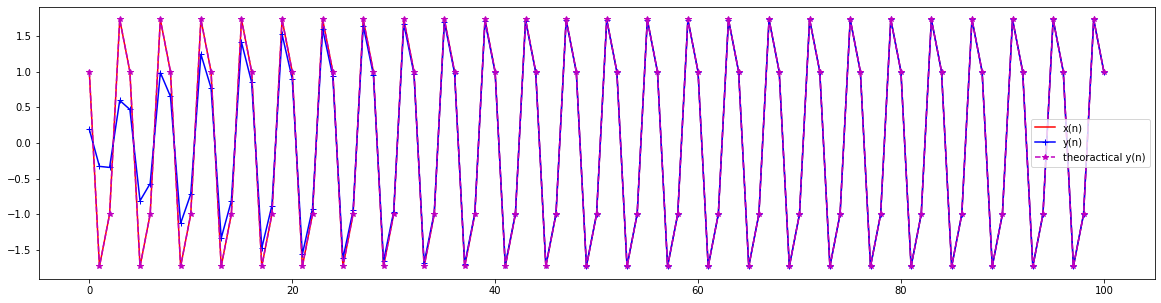

In [3]:
## e.
import numpy as np
from scipy.signal import *
import matplotlib.pyplot as plt

n = np.linspace(0, 100, 101)
b = np.array([0.19])
a = np.array([1, 0, 0.81])
xn = 2*np.cos(np.pi*n/2 + np.pi/3)
yn = lfilter(b, a, xn)
yn_ref = 2*np.cos(np.pi*n/2 + np.pi/3)
plt.figure(figsize=(20, 5))
plt.plot(n, xn, '-r', label='x(n)')
plt.plot(n, yn, '-+b', label='y(n)')
plt.plot(n, yn_ref, '--*m', label='theoractical y(n)')
plt.legend()
plt.show()


# 2. Problem 5.30

In [4]:
import numpy as np
from scipy.signal import *
import matplotlib.pyplot as plt
def system_plot(n , xn, b, a):
    yn = lfilter(b, a, xn)
    norm = 0
    deno = 0
    j = 1j
    omega = np.linspace(-np.pi, np.pi, 101)
    for i in range(len(b)):
        norm = norm + b[i]*np.exp(-j*omega*i)
    for i in range(len(a)):
        deno = deno + a[i]*np.exp(-j*omega*i)
    H = norm/deno
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1);
    plt.plot(omega/np.pi, np.absolute(H))
    plt.xlabel('$\omega/\pi$')
    plt.title('Magnitude')
    plt.subplot(1,2,2);
    plt.plot(omega/np.pi, np.angle(H))
    plt.xlabel('$\omega/\pi$')
    plt.title('Phase')
    plt.show()
    
    plt.figure(figsize=(20,5))
    plt.plot(n, xn, '-+b', label='input')
    plt.plot(n, yn, '-*r', label='output')
    plt.xlabel('Input and output')
    plt.title('n')
    plt.legend()
    plt.show()

In [5]:
n = np.linspace(0, 60, 61)
xn = np.sin(0.1*np.pi*n) + 1/3*np.sin(0.3*np.pi*n) + 1/5*np.sin(0.5*np.pi*n)

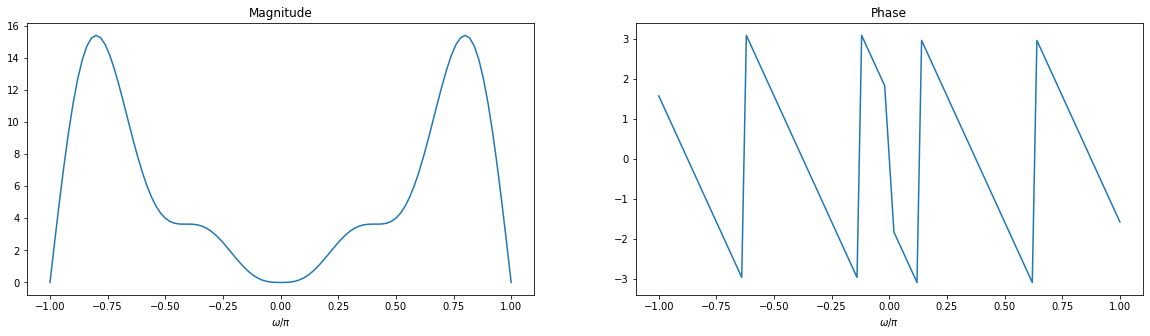

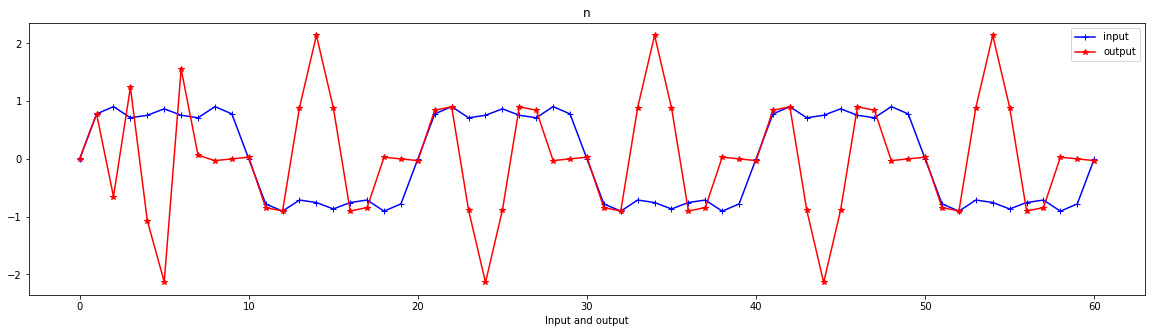

In [6]:
#a. h[n] = {1,−2, 3,−4, 0, 4,−3, 2,−1}
b = np.array([1, -2, 3, -4, 0, 4, -3, 2, -1])
a = np.array([1])
system_plot(n, xn, b, a)

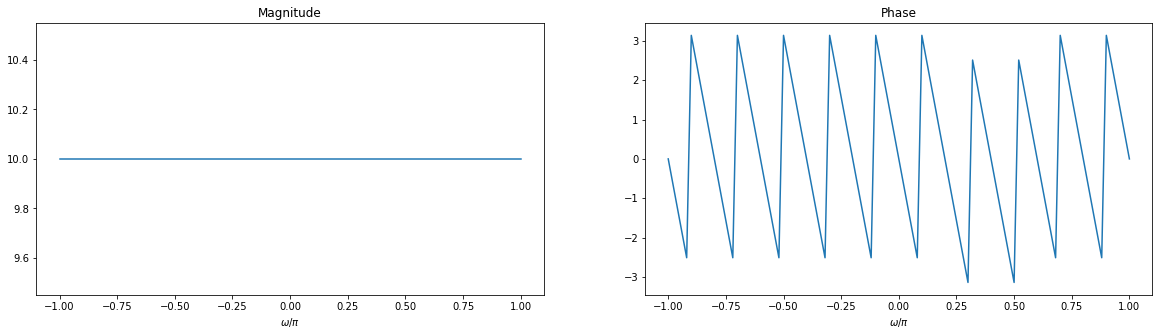

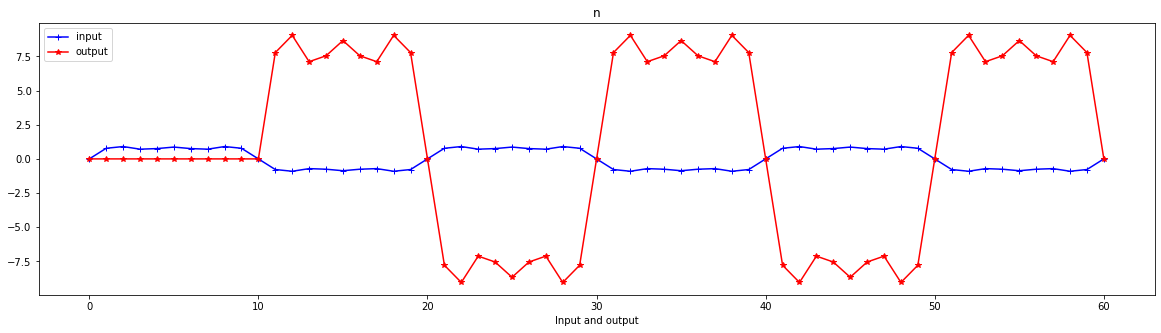

In [7]:
#b. y[n] = 10x[n-10]
b = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10])
a = np.array([1])
system_plot(n, xn, b, a)

# problem 5.16
a.
$$
H_{lp}(e^{j\omega}) = \frac{\sum_{k=0}^{M}b_ke^{-jk\omega}}{1+\sum_{k=0}^{N}a_ke^{-jk\omega}}
$$
If we applied the rule of 5.144, we have:
$$
H_{hp}(e^{j\omega}) = H_{lp}(e^{j(\omega-\pi)}) = \frac{\sum_{k=0}^{M}b_ke^{-jk(\omega-\pi)}}{1+\sum_{k=0}^{N}a_ke^{-jk(\omega-\pi)}} \\
=> Y(e^{j\omega})*({1+\sum_{k=0}^{N}a_ke^{-jk(\omega-\pi)}}) = X(e^{j\omega}) * \sum_{k=0}^{M}b_ke^{-jk(\omega-\pi)} \\
$$
Apply Furier transform properties, we have:
$$
y[n] + \sum_{k=1}^{N}a_ke^{-jk\pi}y[n-k] = \sum_{k=0}^{M}b_ke^{-jk\pi}x[n-k] \\
$$
we know that: $e^{-jk\pi} = 1$ if $k$ is even, $-1$ if $k$ is odd.
$$
=> y[n] = -\sum_{k=1}^{N}(-1)^ka_ky[n-k] = \sum_{k=0}^{M}(-1)^kb_kx[n-k] \\
$$

b.
$$
H_{lp}(e^{j\omega}) = \frac{1+1.655e^{-j\omega}+1.655e^{-2j\omega}+e^{-3j\omega}}{1-1.57e^{-j\omega}+1.264e^{-2j\omega}-0.4e^{-3j\omega}} \\
H_{hp}(e^{j\omega}) = \frac{1-1.655e^{-j\omega}+1.655e^{-2j\omega}-e^{-3j\omega}}{1+1.57e^{-j\omega}+1.264e^{-2j\omega}+0.4e^{-3j\omega}} \\
$$

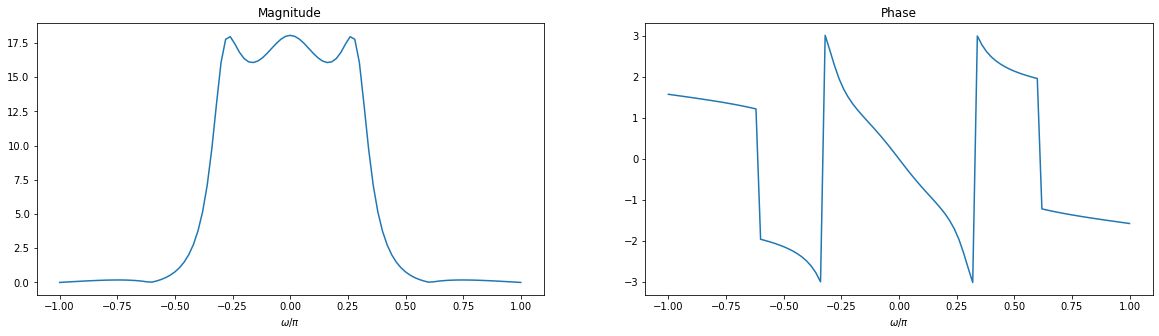

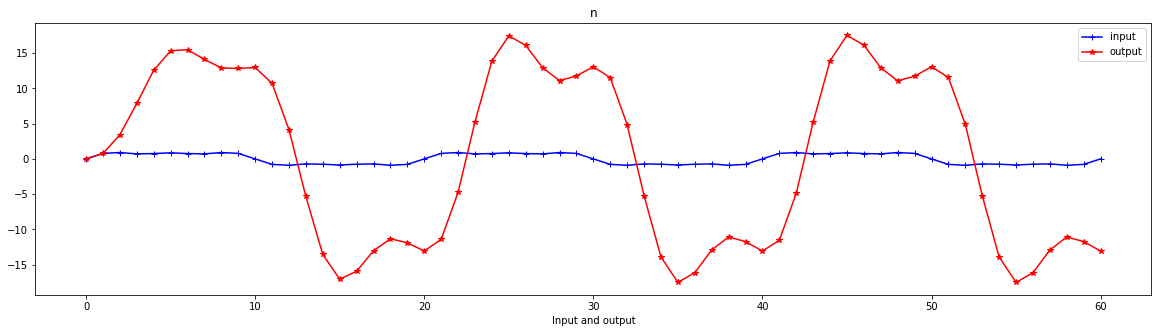

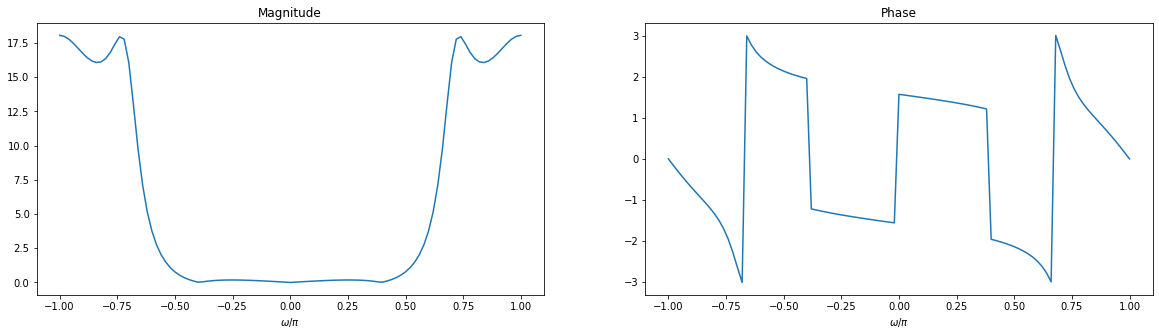

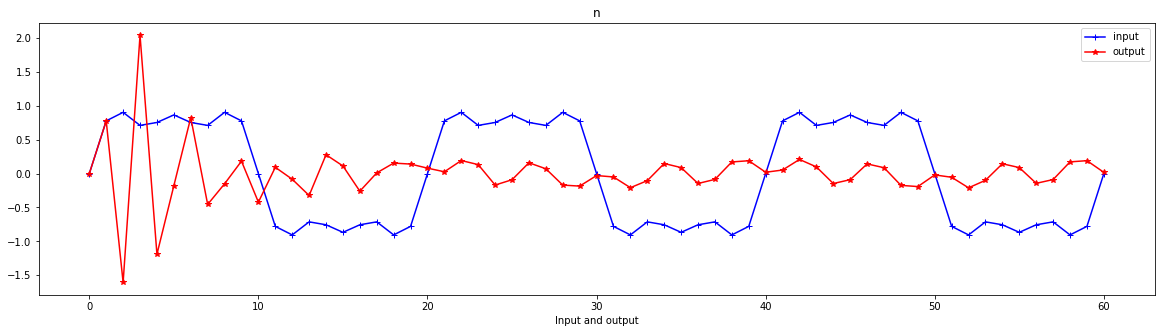

In [10]:
n = np.linspace(0, 60, 61)
xn = np.sin(0.1*np.pi*n) + 1/3*np.sin(0.3*np.pi*n) + 1/5*np.sin(0.5*np.pi*n)
# lowpass
b = np.array([1, 1.655, 1.655, 1])
a = np.array([1, -1.57, 1.264, -0.4])
system_plot(n, xn, b, a)
# highpass
b = np.array([1, -1.655, 1.655, -1])
a = np.array([1, 1.57, 1.264, 0.4])
system_plot(n, xn, b, a)

# problem 5.38.
![](figure/chap5_01.jpg)

Apply the guide line above, we have

![](figure/chap5_02.jpg)

As the constrain of

![](figure/chap5_03.jpg)

by applying the resonators formular on p.240:

$$
b_0 = (1-r)\sqrt{(1+r^2-2r\cos{2\phi})}
$$
Where, $\phi=\frac{\pi}{4}$
And the 3-dB bandwidth can be approximated by
$$
\delta\omega ≈ 2(1-r), r≈1-
$$

=>$\delta\omega = 0.1 = 2(1-r)$
=>$r = 0.95, b_0 = 0.0488$

c:\users\au675308\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\filter_design.py:691: UserWarning: The group delay is singular at frequencies [-3.142, 0.000, 3.142], setting to 0
  format(", ".join("{0:.3f}".format(ws) for ws in w[singular]))


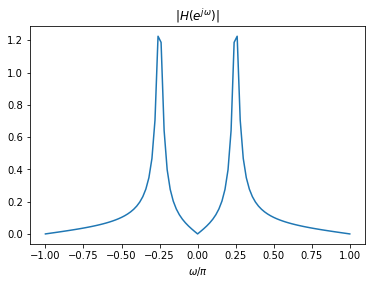

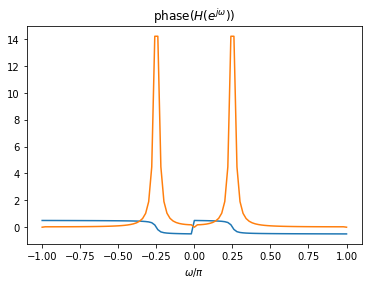

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import group_delay

a = 1j
r = 0.95
b0 = 0.0488
b0 = 0.069
omega = np.linspace(-np.pi, np.pi, 101)

H = b0*(1-np.exp(-a*omega))*(1+np.exp(-a*omega))/((1-r*np.exp(a*np.pi/4)*np.exp(-a*omega)) * (1-r*np.exp(-a*np.pi/4)*np.exp(-a*omega)))
mag = np.absolute(H)
phase = np.angle(H)

plt.figure()
plt.plot(omega/np.pi, mag)
plt.xlabel('$\omega/\pi$')
plt.title('$|H(e^{j\omega})|$')

plt.figure()
plt.plot(omega/np.pi, phase/np.pi)
plt.xlabel('$\omega/\pi$')
plt.title('phase(${H(e^{j\omega})}$)')

f = np.linspace(-np.pi, np.pi, 101)
b = np.array([b0, 0, -b0])
a = np.array([1, -r*np.sqrt(2), r**2])
w, gd = signal.group_delay((b, a), f)
plt.plot(w/np.pi, gd)